<a href="https://colab.research.google.com/github/rahulgouda7/credit_score_analysis/blob/main/Major_Project_CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing dataset

In [ ]:
dataset=pd.read_excel("/content/a_Dataset_CreditScoring.xlsx")

### Data preparation

In [ ]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [ ]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [ ]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [ ]:
# explore missing values
dataset.isna().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [ ]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [ ]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [ ]:
# # count of good loans (0) and bad loans (1)
# dataset['TARGET'].value_counts()

In [ ]:
# # data summary across 0 & 1
# dataset.groupby('TARGET').mean()

### Train Test Split

In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [ ]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, '/content/f2_Normalisation_CreditScoring')

['/content/f2_Normalisation_CreditScoring']

### Risk Model building

In [ ]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=5, random_state=1, shuffle=True)
score=cross_val_score(classifier, X, y, cv=kf, n_jobs=-1)
print(score.mean())
#print("cross validation score are {}".format(score))
#print("Average cross validation score :{}".format(score.mean()))

0.8310000000000001


In [ ]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, '/content/f1_Classifier_CreditScoring')

['/content/f1_Classifier_CreditScoring']

### Model *performance*

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[729  25]
 [115  31]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8444444444444444


### Writing output file

In [ ]:
predictions = classifier.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn import metrics
auc1=round(metrics.roc_auc_score(y_test,predictions),4)
auc1

0.7674

In [ ]:
from sklearn.metrics import roc_curve
fpr1,tpr1,thresh1=roc_curve(y_test,predictions)

In [ ]:
random_probs= [0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test, random_probs, pos_label=1)

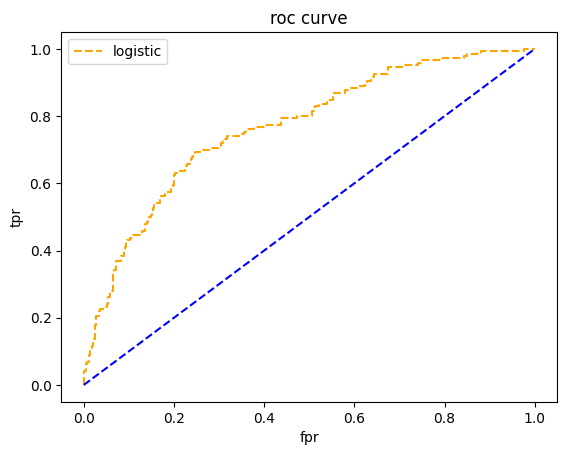

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='logistic')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='best')
plt.show()

In [ ]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/c1_Model_Prediction.xlsx", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,predicted_TARGET
0,1,0.962405,1
1,0,0.077323,0
2,0,0.305995,0
3,0,0.077789,0
4,0,0.106927,0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier2=AdaBoostClassifier(random_state=96)
classifier2.fit(X_train,y_train)
y_pred2=classifier2.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=5, random_state=1, shuffle=True)
score=cross_val_score(classifier2, X, y, cv=kf, n_jobs=-1)
print(score.mean())
#print("cross validation score are {}".format(score))
#print("Average cross validation score :{}".format(score.mean()))

0.8326666666666667


In [ ]:
joblib.dump(classifier2, '/content/f1_Classifier2_CreditScoring')

['/content/f1_Classifier2_CreditScoring']

In [ ]:
print(confusion_matrix(y_test,y_pred2))

[[711  43]
 [110  36]]


In [ ]:
print(accuracy_score(y_test, y_pred2))

0.83


In [ ]:
predictions2 = classifier2.predict_proba(X_test)[:,1]

In [ ]:
auc2=round(metrics.roc_auc_score(y_test,predictions2),4)
auc2

0.7557

In [ ]:
fpr2,tpr2,thresh2=roc_curve(y_test,predictions2)

In [ ]:
random_probs= [0 for i in range(len(y_test))]
p_fpr2,p_tpr2,_=roc_curve(y_test, random_probs, pos_label=1)

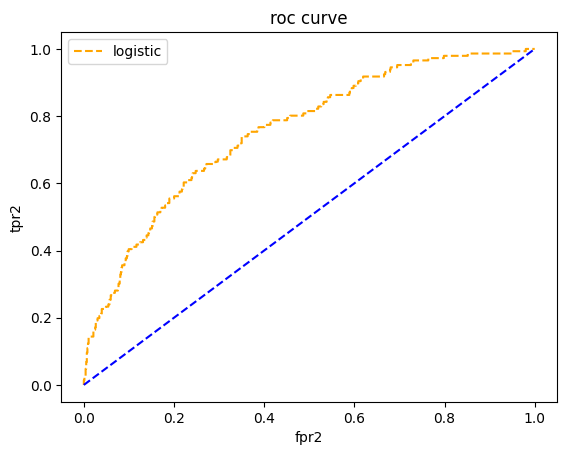

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='logistic')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
plt.title('roc curve')
plt.xlabel('fpr2')
plt.ylabel('tpr2')
plt.legend(loc='best')
plt.show()

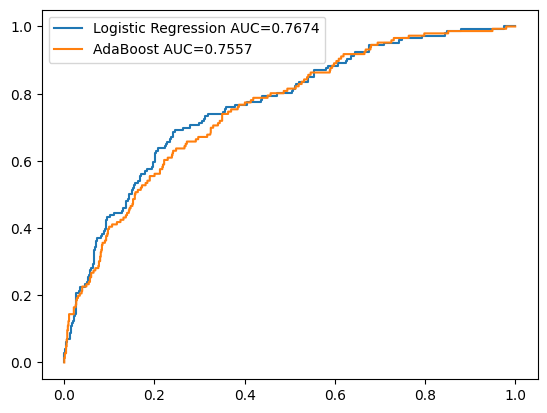

In [ ]:
plt.figure(0).clf()
plt.plot(fpr1,tpr1, label="Logistic Regression AUC="+str(auc1))
plt.plot(fpr2, tpr2, label="AdaBoost AUC="+str(auc2))
plt.legend()

### Coding ends here!